# Reis 2018: Energy Transactions Between Energy Community Members: an Agent-Based Modeling Approach

Dropbox paper link: https://www.dropbox.com/scl/fi/n7y210n2nw4adwt0z1661/MAG-Reis-2018-Energy-Transactions-Between-Energy-Community-Members-an-Agent-Based-Modeling-Approach.paper?dl=0&rlkey=kb1ahk6fb1epe3m9z5c67te03

![](https://paper-attachments.dropbox.com/s_37085FABBCFF1589B459B503185C759DA5931ECE59C4B3CBA4398BF6CCBF020C_1592258495565_image.png)


## Delovanje prosumerja
1. Prosumer generira (MAX power of PV → 5kW peak, kapaciteta baterije 3kWh)
2. PV generation odvisen od vremena, zato 3 vremenska stanja:
    1. Sončen dan (Max moč) 
    2. Partly cloudy ( Polovična moč)
    3. Rainy day (Brez moči)  
3. Prosumer občutljiv na tarifo. Pet različnih cenovnih razredov (tabela ToU) → Zamika opravila glede na ceno. Njegova baterija se sproži, če je cena iz omrežja dražja kot establishan treshold. Se pravi, če shranjena energija no dovolj za prosumerja, se odloči ali sprejme energijo za ceno od ponudnika, ali prestavi opravilo na obdobje s cenejšo energijo (ampak samo pralni in pomivalni stroj v roku 36 ur)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

### 1. Preprosta simulacija proizvodnje energije in porabe energije 
V prvi fazi sestavimo preprosto simulacijo proizvodnje in porabe električne energije za rok enega dneva, s pogojem če je vreme sončno. Proizvodnja energije je cel dan stalna z 10kW na uro, poraba energije pa poteka samo v drugi polovici dneva z velikostjo 5kW/h. V rezultatih vidimo prikaz stanja energije, ki jo prosumer trenutno ima. 

In [9]:
prosumerGeneration = 0 # začetna proizvodnja energije je 0 
prosumerConsumption = 5 # poraba bo stalna za 5kw/h
sunny = True

t = 0  #24 ur 
while t < 24:
    if sunny == True:
        prosumerGeneration += 10 #vsako uro naredi 10kw če je sonce
        t += 1
    if t > 11:
        prosumerGeneration = prosumerGeneration - prosumerConsumption
        
    print("Ura:", t, "Kapaciteta prosumerja: ",  prosumerGeneration, "kW")

Ura: 1 Kapaciteta prosumerja:  10 kW
Ura: 2 Kapaciteta prosumerja:  20 kW
Ura: 3 Kapaciteta prosumerja:  30 kW
Ura: 4 Kapaciteta prosumerja:  40 kW
Ura: 5 Kapaciteta prosumerja:  50 kW
Ura: 6 Kapaciteta prosumerja:  60 kW
Ura: 7 Kapaciteta prosumerja:  70 kW
Ura: 8 Kapaciteta prosumerja:  80 kW
Ura: 9 Kapaciteta prosumerja:  90 kW
Ura: 10 Kapaciteta prosumerja:  100 kW
Ura: 11 Kapaciteta prosumerja:  110 kW
Ura: 12 Kapaciteta prosumerja:  115 kW
Ura: 13 Kapaciteta prosumerja:  120 kW
Ura: 14 Kapaciteta prosumerja:  125 kW
Ura: 15 Kapaciteta prosumerja:  130 kW
Ura: 16 Kapaciteta prosumerja:  135 kW
Ura: 17 Kapaciteta prosumerja:  140 kW
Ura: 18 Kapaciteta prosumerja:  145 kW
Ura: 19 Kapaciteta prosumerja:  150 kW
Ura: 20 Kapaciteta prosumerja:  155 kW
Ura: 21 Kapaciteta prosumerja:  160 kW
Ura: 22 Kapaciteta prosumerja:  165 kW
Ura: 23 Kapaciteta prosumerja:  170 kW
Ura: 24 Kapaciteta prosumerja:  175 kW


# 2. Dodajanje zunanjih inputov v obliki csv datoteke
V naslednjem koraku se dodajo podatki v obliki csv datoteke. Za manipulacijo csv datotek uporabljamo knjižnico Pandas.
Tabela je generirana ročno in vsebuje abstrakten profil proizvodnje in porabe električne energije v enem dnevu. 

Podatke najprej preberemo in shranimo v spremenljivko. V naslednjem koraku določimo stolpec z urami kot indeks tabele.
Spodaj še izrišemo graf iz podatkov v tabeli.

In [10]:
data = pd.read_csv('Data/ReisData1.csv')
data = data.set_index('Time')
data.head()
data.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64', name='Time')

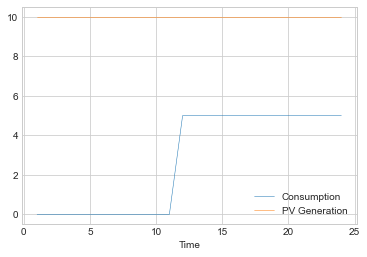

In [11]:
data[['Consumption','PV Generation']].plot(linewidth=0.5);

Najprej ponovimo prejšnji primer simulacije s podatki iz tabele. Tokrat se za vsako uro podatki preberejo iz tabele in se med seboj primerno seštejejo oz. odštejejo. Potek nabiranja energije skozi dan simulacije izrišemo spodnjem grafu. 

1 Storage:  10
2 Storage:  20
3 Storage:  30
4 Storage:  40
5 Storage:  50
6 Storage:  60
7 Storage:  70
8 Storage:  80
9 Storage:  90
10 Storage:  100
11 Storage:  110
12 Storage:  115
13 Storage:  120
14 Storage:  125
15 Storage:  130
16 Storage:  135
17 Storage:  140
18 Storage:  145
19 Storage:  150
20 Storage:  155
21 Storage:  160
22 Storage:  165
23 Storage:  170
24 Storage:  175


<BarContainer object of 24 artists>

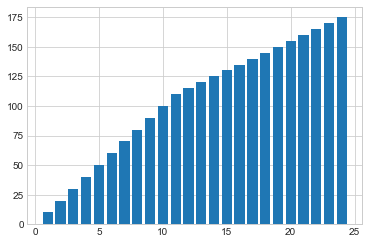

In [12]:
storage = 0
storagePlt = []

for index, row in data.iterrows():
    generation = row['PV Generation']
    consumption = row['Consumption']
    
    storage += row['PV Generation'] # v shrambo dodaj energijo trenutne proizvodnje
   
    if consumption > 0: # v primeru da se pojavi poraba iz shrambe odštej vrednost porabe 
        storage -= consumption
        storagePlt.append(storage) # ob i-it uri dodaj vrednost shranjene energije v seznam
    else:
        storagePlt.append(storage)
    print(index, "Storage: ", storage)
    
plt.bar(data.index,storagePlt)  
   

# 3. Omejena velikost shrambe in prodaja energije omrežju
V naslednjem koraku, se modelu doda omejitev energije, ki jo prosumer lahko shrani. V primeru viška energije, proda energijo v omrežje za nek dobiček. 

Ostanek  10 Profit  5.0
Ostanek  5 Profit  7.5
Ostanek  5 Profit  10.0
Ostanek  5 Profit  12.5
Ostanek  5 Profit  15.0
Ostanek  5 Profit  17.5
Ostanek  5 Profit  20.0


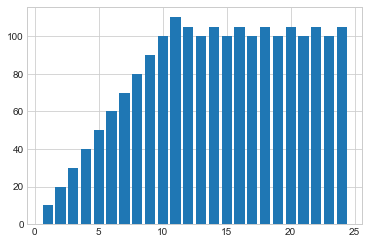

In [13]:
storage = 0
storageCapacity = 100
storagePlt = []
profit = 0 

for index, row in data.iterrows():
    generation = row['PV Generation']
    consumption = row['Consumption']
    
    if storage > storageCapacity:
        ostanek = storage - storageCapacity
        profit += ostanek* 0.5
        print('Ostanek ', ostanek, 'Profit ', profit)
    else:
        storage += row['PV Generation']
    
    if consumption > 0:
        storage -= consumption
        storagePlt.append(storage)
    else:
        storagePlt.append(storage)  
plt.bar(data.index,storagePlt)  

PV = 5
trenutnaPoraba = 9
baterija = 0
omrezje = 0

ostanek = PV - trenutnaPoraba

if ostanek > 0:
    baterija = baterija + ostanek
else: 
    omrezje = omrezje + ostanek

Zgornji graf prikazuje polnjenje shrambe do meje pri 100kW

In [14]:
#TODO: Preveri zakaj pri grafu gre energija čez željeno mejo
#TODO: Kaj se zgodi če zmanjka energije in je še vedno zahteva? Dodaj dataset z večjo porabo in mehanizem, ki kupi dovolj energije iz omrežja po fiksni ceni
#TODO: Dodaj še consumerja. V primeru viška energije prosumer proda energijo consumerju.
